# Import libraries, import dataset, scale dataset, train-test split

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from tensorflow import keras

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

from google.colab import files

In [ ]:
uploaded = files.upload()
df = pd.read_csv("Honours Project Dataset - Sheet1.csv")

X = df.drop('Risk', axis=1)
y = df[['Risk']].values

transformer = make_column_transformer(
    (MinMaxScaler(),[
         'PEP', 'NET Worth', 'Investment', '% of NET', 'Profile'            
    ]),
    (OneHotEncoder(handle_unknown='ignore'), [
          'Nationality', 'Residence', 'Business', 'Source of Funds', 'Product'                                    
    ])
)

transformer.fit(X)

X = transformer.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

Saving Honours Project Dataset - Sheet1.csv to Honours Project Dataset - Sheet1.csv


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=90)

# Testing

In [ ]:
def train_model():
  model.fit(x=X_train, y=y_train, 
          validation_data=(X_test, y_test), 
          epochs=500,
          callbacks=[early_stop],
          batch_size=10,
          verbose=0)
  get_model_performance()

def get_model_performance():
  prediction = model.predict(X_test)
  model_mse = mean_squared_error(y_test, prediction)
  model_mae = mean_absolute_error(y_test, prediction)
  model_evs = explained_variance_score(y_test, prediction)
  mse_scores.append(model_mse)
  mae_scores.append(model_mae)
  evs_scores.append(model_evs)

def Average(array):
  return sum(array) / len(array)


In [ ]:
mse_scores = []
mae_scores = []
evs_scores = []


i = 0
while i < 10:
  #Define model
  model = Sequential()

  model.add(Dense(10,activation='relu'))
  model.add(Dropout(0.1))

  model.add(Dense(7,activation='relu'))

  model.add(Dense(5,activation='relu'))

  model.add(Dense(7,activation='relu'))


  model.add(Dense(1))

  model.compile(optimizer='rmsprop', loss='mae')

  #Train model
  train_model()

  #Delet model for fresh creation
  del model

  #Increase counter
  i+=1

  #Print counter
  print("Iteration:")
  print(i)

In [ ]:
mse_average = Average(mse_scores)
mae_average = Average(mae_scores)
evs_average = Average(evs_scores)

mse_average, mae_average, evs_average

(3.166668071313673, 1.3752592690785728, 0.33208132934758366)

In [ ]:
mae_scores

[1.5230558236440024,
 1.5591840585072836,
 1.4328696409861246,
 1.4994930982589723,
 1.5251124620437622,
 1.4286585172017416,
 1.5814624706904092,
 1.5596343835194906,
 1.4723613063494365,
 1.5078900575637817]

In [ ]:
mse_scores.pop(7)
mae_scores.pop(7)
evs_scores.pop(7)

-2.0340965199538985e-05

# Creating and Saving optimal model


In [ ]:
del model

In [ ]:
#Define model
model = Sequential()

model.add(Dense(10,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(7,activation='relu'))
  #model.add(Dropout(0.1))

model.add(Dense(5,activation='relu'))
  #model.add(Dropout(0.1))

model.add(Dense(7,activation='relu'))
  #model.add(Dropout(0.1))


model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')


In [ ]:
model.fit(x=X_train, y=y_train, 
          validation_data=(X_test, y_test), 
          epochs=700,
          callbacks=[early_stop],
          batch_size=10,
          verbose=0)

Epoch 00124: early stopping


In [ ]:
prediction = model.predict(X_test)

model_mse = mean_squared_error(y_test, prediction)
model_mae = mean_absolute_error(y_test, prediction)

model_mse, model_mae

(1.8975205307926444, 1.0731193860371908)

In [ ]:
model.save('optimal 1-8 1-07.h5')
files.download('optimal 1-8 1-07.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
model.summary()

# Evaluation

In [ ]:
uploaded = files.upload()
model = keras.models.load_model('optimal 1-8 1-07.h5')

In [ ]:
model.summary()

In [ ]:
prediction = model.predict(X_test)
model_mse = mean_squared_error(y_test, prediction)
model_mae = mean_absolute_error(y_test, prediction)
model_evs = explained_variance_score(y_test, prediction)
model_mse, model_mae, model_evs

(1.8975205307926444, 1.0731193860371908, 0.45824144687357304)

(3.0, 10.0)

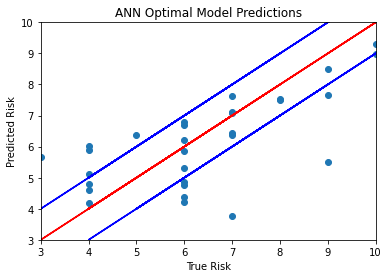

In [ ]:
plt.scatter(y_test, prediction)
plt.plot(y_test, y_test, 'r')
plt.plot(y_test + 1, y_test, 'b')
plt.plot(y_test, y_test + 1, 'b')
plt.title('ANN Optimal Model Predictions')
plt.xlabel('True Risk')
plt.ylabel('Predicted Risk')
plt.ylim(min(y_test), max(y_test))
plt.xlim(min(y_test), max(y_test))